 =============================================================
  ##               TRABAJO FINAL INTEGRADOR       
  
  ###               APRENDIZAJE DE MÁQUINA 1
  ###                   Census Income
 =============================================================

 **ALUMNOS:**
- Mauro Fabián Barquinero
- Mariano Campos
- Juan Cruz Ojeda
- Jose Luis Perez Galindo

## DATESET
Census Income <br>
Kaggle: https://www.kaggle.com/datasets/tawfikelmetwally/census-income-dataset/data

## IMPORTS

In [5133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#meétricas
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve 
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.preprocessing import LabelBinarizer

import warnings
warnings.filterwarnings('ignore')


## 1. CARGA DE DATOS - DATASET

In [5134]:
# Cargar dataset
file_path_test_data = "./adult.csv"
file_path_train_data = "./adult.test.csv"

train_data = pd.read_csv(file_path_test_data)
test_data= pd.read_csv(file_path_train_data)

## 2. ANALISIS DE LA ESTRUCTURA DEL DATASET

In [ ]:
# Se explora la estructura del dataset
print("\n🔹 Primeras filas del dataset TRAIN")
train_data.head()


🔹 Primeras filas del dataset train


,Age,Workclass,Final Weight,Education,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,capital loss,Hours per Week,Native Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
# Se explora la estructura del dataset
print("\n🔹 Primeras filas del dataset TEST")
test_data.head()


🔹 Primeras filas del dataset test


,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0.1,40,United-States,<=50K.
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
3,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.


El dataset de test contiene solo los datos sin los headers. Se procede a agregar las columnas al dataset de los tests.

In [ ]:
# Se obtiene los headers de train dataset
test_data.columns = train_data.columns.tolist()
# Se agregan los valores, se los concatena y se los incorpora en un único dataset 'df'
df = pd.concat([train_data, test_data], axis=0)
df.head(5)

,Age,Workclass,Final Weight,Education,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,capital loss,Hours per Week,Native Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Diccionario de Datos

A continuación se transcribe la descripción de las variables disponibles en este dataset de [[la fuente]] https://www.kaggle.com/datasets/tawfikelmetwally/census-income-dataset/data

* age: la edad de un individuo.

* workclass: el tipo de trabajo o empleo de un individuo. Puede tener las siguientes categorías:
    * Private: trabajando en el sector privado.
    * Self-emp-not-inc: autónomos no incorporados (trabajadores por cuenta propia no constituidos como empresa).
    * Self-emp-inc: autónomos incorporados (trabajadores por cuenta propia constituidos como empresa).
    * Federal-gov: trabajando para el gobierno federal.
    * Local-gov: trabajando para el gobierno local.
    * State-gov: trabajando para el gobierno estatal.
    * Without-pay: sin trabajo y sin remuneración.
    * Never-worked: nunca ha trabajado.

* Final Weight: los pesos en los archivos CPS están ajustados según estimaciones independientes de la población civil no institucional de EE.UU. Estas estimaciones son preparadas mensualmente por la División de Población del Buró del Censo. Usamos 3 conjuntos de controles.

* education: el nivel más alto de educación completado.

* education-num: el número de años de educación completados.

* marital-status: el estado civil.

* occupation: el tipo de trabajo desempeñado por un individuo.

* relationship: el estado de relación (por ejemplo, cónyuge, hijo/a, jefe/a de familia).

* race: la raza de un individuo.

* sex: el género de un individuo.

* capital-gain: la cantidad de ganancia de capital (beneficio financiero).

* capital-loss: la cantidad de pérdida de capital que ha tenido un individuo.

* hours-per-week: el número de horas trabajadas por semana.

* native-country: el país de origen o país natal.

* income: el nivel de ingresos de un individuo y sirve como variable objetivo. Indica si los ingresos son mayores a $50,000 o menores o iguales a $50,000, representado como (>50K, <=50K).

In [5138]:
print("3 primeras filas completas")
df.head(3).T

3 primeras filas completas


,0,1,2
Age,39,50,38
Workclass,State-gov,Self-emp-not-inc,Private
Final Weight,77516,83311,215646
Education,Bachelors,Bachelors,HS-grad
EducationNum,13,13,9
Marital Status,Never-married,Married-civ-spouse,Divorced
Occupation,Adm-clerical,Exec-managerial,Handlers-cleaners
Relationship,Not-in-family,Husband,Not-in-family
Race,White,White,White
Gender,Male,Male,Male


In [5139]:
print("\n🔹 Información general del dataset")
df.info()


🔹 Información general del dataset
<class 'pandas.core.frame.DataFrame'>
Index: 48841 entries, 0 to 16279
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             48841 non-null  int64 
 1   Workclass       48841 non-null  object
 2   Final Weight    48841 non-null  int64 
 3   Education       48841 non-null  object
 4   EducationNum    48841 non-null  int64 
 5   Marital Status  48841 non-null  object
 6   Occupation      48841 non-null  object
 7   Relationship    48841 non-null  object
 8   Race            48841 non-null  object
 9   Gender          48841 non-null  object
 10  Capital Gain    48841 non-null  int64 
 11  capital loss    48841 non-null  int64 
 12  Hours per Week  48841 non-null  int64 
 13  Native Country  48841 non-null  object
 14  Income          48841 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [5140]:
print("\n🔹 Cantidad de filas y columnas", df.shape)


🔹 Cantidad de filas y columnas (48841, 15)


In [5141]:
print("n\🔹 Nombres de las columnas del dataset:")
list(df.columns)

n\🔹 Nombres de las columnas del dataset:


['Age',
 'Workclass',
 'Final Weight',
 'Education',
 'EducationNum',
 'Marital Status',
 'Occupation',
 'Relationship',
 'Race',
 'Gender',
 'Capital Gain',
 'capital loss',
 'Hours per Week',
 'Native Country',
 'Income']

# 3. LIMPIEZA DE LOS DATOS

### 3.1 Tipos de datos

In [5142]:
# repasamos los dtypes
df.dtypes.rename('dtypes').to_frame()

,dtypes
Age,int64
Workclass,object
Final Weight,int64
Education,object
EducationNum,int64
Marital Status,object
Occupation,object
Relationship,object
Race,object
Gender,object


* Lo que podemos observar es que no hay columnas con fechas.
* Solo hay dos tipos de datos en el dataset. `int64` y `object`.

### 3.2 Estandarización de columnas
Para facilitar su uso, las campos del dataset se llevan a minúsculas.

In [5143]:
# Se estandariza los nombres de las columnas a minusculas y se limpian espacios.
df.columns = (
    df.columns.
    str.strip().
    str.lower()
)

# Mostrar columnas resultantes
df.columns.tolist()

['age',
 'workclass',
 'final weight',
 'education',
 'educationnum',
 'marital status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'capital gain',
 'capital loss',
 'hours per week',
 'native country',
 'income']

### 3.3 Se remueven los espacios en blancos de los valores

In [5144]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip()

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48841 entries, 0 to 16279
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48841 non-null  int64 
 1   workclass       48841 non-null  object
 2   final weight    48841 non-null  int64 
 3   education       48841 non-null  object
 4   educationnum    48841 non-null  int64 
 5   marital status  48841 non-null  object
 6   occupation      48841 non-null  object
 7   relationship    48841 non-null  object
 8   race            48841 non-null  object
 9   gender          48841 non-null  object
 10  capital gain    48841 non-null  int64 
 11  capital loss    48841 non-null  int64 
 12  hours per week  48841 non-null  int64 
 13  native country  48841 non-null  object
 14  income          48841 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


### 3.4 Valores faltantes

In [5145]:
# Verificar valores faltantes por columna
df.isnull().sum()

age               0
workclass         0
final weight      0
education         0
educationnum      0
marital status    0
occupation        0
relationship      0
race              0
gender            0
capital gain      0
capital loss      0
hours per week    0
native country    0
income            0
dtype: int64

In [5146]:
df['age'].unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87, 89])

In [5147]:
df['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [5148]:
df['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

Podemos observar un '?'. Esto representa valores faltantes. Se lo va a reemplazar aquellos ? por NaN

In [5149]:
df.replace("?", np.nan, inplace=True)

Se verifican la cantidad de valores faltantes

In [5150]:
missing_data = (df.isna().sum()
                  .pipe(lambda s: s[s > 0]) # Filtro solo aquellas campos que tengan valores faltantes
                  .sort_values(ascending=False)
                  .reset_index())

missing_data.columns = ['Columna', 'Valores Faltantes']
print(missing_data)

          Columna  Valores Faltantes
0      occupation               2809
1       workclass               2799
2  native country                857


In [5151]:
df['workclass'].value_counts()

workclass
Private             33905
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

Podemos visualizar que hay 10 valores con 'Never-worked'. Esto indica que la persona nunca trabajo

In [5152]:
df['occupation'].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3021
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

Los campos campos 'workclass' y 'occupation' estan correlacionados. 

In [5153]:
df[df['occupation'].isna() & ~df['workclass'].isna()]

,age,workclass,final weight,education,educationnum,marital status,occupation,relationship,race,gender,capital gain,capital loss,hours per week,native country,income
5361,18,Never-worked,206359,10th,6,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K
10845,23,Never-worked,188535,7th-8th,4,Divorced,NaN,Not-in-family,White,Male,0,0,35,United-States,<=50K
14772,17,Never-worked,237272,10th,6,Never-married,NaN,Own-child,White,Male,0,0,30,United-States,<=50K
20337,18,Never-worked,157131,11th,7,Never-married,NaN,Own-child,White,Female,0,0,10,United-States,<=50K
23232,20,Never-worked,462294,Some-college,10,Never-married,NaN,Own-child,Black,Male,0,0,40,United-States,<=50K
32304,30,Never-worked,176673,HS-grad,9,Married-civ-spouse,NaN,Wife,Black,Female,0,0,40,United-States,<=50K
32314,18,Never-worked,153663,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,4,United-States,<=50K
8784,17,Never-worked,131593,11th,7,Never-married,NaN,Own-child,Black,Female,0,0,20,United-States,<=50K.
11606,20,Never-worked,273905,HS-grad,9,Married-spouse-absent,NaN,Other-relative,White,Male,0,0,35,United-States,<=50K.
13897,18,Never-worked,162908,11th,7,Never-married,NaN,Own-child,White,Male,0,0,35,United-States,<=50K.


Como podemos visualizar 'occupation' tiene valores NaN debido que esta correlacionado a 'workclass' y es lógico. Si la personna nunca trabajó, no va a tener una ocupación. <br>

## La variable occupation presenta valores faltantes bajo un patrón MAR (Missing At Random), ya que la ausencia se explica observando otra variable (workclass). <br>

Se procede con la imputación. Para este caso en particular y debido a que solo hay 10 valores faltantes. Se decile imputar una categoría artificial como 'No-occupation' para los casos que 'workclass'


In [5154]:
df.loc[
    (df['occupation'].isna()) & (df['workclass'] == 'Never-worked'),
    'occupation'
] = 'No-occupation'

df[df['workclass'] == 'Never-worked'][['age', 'workclass', 'occupation', 'native country', 'income']]

,age,workclass,occupation,native country,income
5361,18,Never-worked,No-occupation,United-States,<=50K
10845,23,Never-worked,No-occupation,United-States,<=50K
14772,17,Never-worked,No-occupation,United-States,<=50K
20337,18,Never-worked,No-occupation,United-States,<=50K
23232,20,Never-worked,No-occupation,United-States,<=50K
32304,30,Never-worked,No-occupation,United-States,<=50K
32314,18,Never-worked,No-occupation,United-States,<=50K
8784,17,Never-worked,No-occupation,United-States,<=50K.
11606,20,Never-worked,No-occupation,United-States,<=50K.
13897,18,Never-worked,No-occupation,United-States,<=50K.


In [5155]:
missing_data = (df.isna().sum()
                  .pipe(lambda s: s[s > 0]) # Filtro solo aquellas campos que tengan valores faltantes
                  .sort_values(ascending=False)
                  .reset_index())

missing_data.columns = ['Columna', 'Valores Faltantes']
print(missing_data)

          Columna  Valores Faltantes
0       workclass               2799
1      occupation               2799
2  native country                857


Como puedo ambas coinciden. Vamos a hacer un análisis mas profundp

In [5156]:
occupation_nan = df['occupation'].isna()
workclass_nan = df['workclass'].isna()

# Cantidad de filas donde ambas columnas son NaN
both_nan = df[occupation_nan & workclass_nan].shape[0]

# Total de NaN por separado
total_occupation_nan = occupation_nan.sum()
total_workclass_nan = workclass_nan.sum()

# Porcentaje de NaN en 'occupation' que también tienen NaN en 'workclass'
pct_occupation_depends_on_workclass = (both_nan / total_occupation_nan) * 100 if total_occupation_nan else 0

# resumen
summary_analysis = {
    'Total NaN en occupation': total_occupation_nan,
    'Total NaN en workclass': total_workclass_nan,
    'Filas con NaN en ambas': both_nan,
    '% de NaN en occupation que también son NaN en workclass': round(pct_occupation_depends_on_workclass, 2),
}
summary_analysis

{'Total NaN en occupation': np.int64(2799),
 'Total NaN en workclass': np.int64(2799),
 'Filas con NaN en ambas': 2799,
 '% de NaN en occupation que también son NaN en workclass': np.float64(100.0)}

Esto indica que hay una dependencia muy fuerte y estamos frente al patrón MAR (Missing At Random). <br>
Debido a que ambas son categóricas y estan estrechamente relacionadas la una con la otra. Se decide imputar una categoria artificial como 'Unknown'.

In [5157]:
# Imputar valores faltantes con 'Unknown'
df['workclass'].fillna('Unknown', inplace=True)
df['occupation'].fillna('Unknown', inplace=True)

# Verificar que ya no existan NaN en esas columnas
missing_after_imputation = df[['workclass', 'occupation']].isna().sum()

missing_after_imputation

workclass     0
occupation    0
dtype: int64

In [5158]:
nan_rows = df[df['occupation'].isna() | df['workclass'].isna()]
nan_rows

,age,workclass,final weight,education,educationnum,marital status,occupation,relationship,race,gender,capital gain,capital loss,hours per week,native country,income


In [5159]:
df[df['native country'].isna()]

,age,workclass,final weight,education,educationnum,marital status,occupation,relationship,race,gender,capital gain,capital loss,hours per week,native country,income
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,NaN,>50K
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,NaN,>50K
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,NaN,<=50K
61,32,Unknown,293936,7th-8th,4,Married-spouse-absent,Unknown,Not-in-family,White,Male,0,0,40,NaN,<=50K
93,30,Private,117747,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,NaN,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15683,46,Private,31411,11th,7,Married-civ-spouse,Other-service,Wife,White,Female,0,0,40,NaN,<=50K.
15710,24,Private,127159,Some-college,10,Never-married,Other-service,Other-relative,White,Female,0,0,24,NaN,<=50K.
16042,24,State-gov,161783,Bachelors,13,Never-married,Transport-moving,Not-in-family,Black,Male,0,0,40,NaN,<=50K.
16089,34,Private,143776,Masters,14,Never-married,Prof-specialty,Not-in-family,Black,Male,0,0,45,NaN,>50K.


Tenemos 857 valores faltantes en 'native country'

In [5160]:
df['native country'].value_counts()[:5]

native country
United-States    43831
Mexico             951
Philippines        295
Germany            206
Puerto-Rico        184
Name: count, dtype: int64

In [5161]:
most_common_country = df['native country'].mode()[0]
print(most_common_country)

United-States


United-States es el valor más frecuente por superior a los demas. Por este motivo se decide imputar este valor al resto de valores faltante.

In [5162]:
# Imputación del valor 'most_common_country' a los valores NaN
df['native country'].fillna(most_common_country, inplace=True)

Dado que la frecuencia es muy grande veremos sus porcentajes para decidir si se debe eliminar o no este campo.

In [5163]:
df['capital gain'].value_counts()

capital gain
0        44806
15024      513
7688       410
7298       364
99999      244
         ...  
1639         1
2387         1
7262         1
1731         1
6612         1
Name: count, Length: 123, dtype: int64

In [5164]:
(df['native country'].value_counts(normalize=True) * 100).round(2).head(5)

native country
United-States    91.50
Mexico            1.95
Philippines       0.60
Germany           0.42
Puerto-Rico       0.38
Name: proportion, dtype: float64

Frecuencia muy grande con el 91.51% para United-States

El valor frecuente es 0. Tiene muchos valores en 0. <br>
Verifiquemos si se cumple lo mismo con 'capital loss'

In [5165]:
df['capital loss'].value_counts()

capital loss
0       46559
1902      304
1977      253
1887      233
2415       72
        ...  
2201        1
1870        1
1911        1
2465        1
1421        1
Name: count, Length: 99, dtype: int64

In [5166]:
pct_gain_0 = (df['capital gain'] == 0).mean() * 100
pct_loss_0 = (df['capital loss'] == 0).mean() * 100

print(f"{round(pct_gain_0, 2)}%  {round(pct_loss_0, 2)}%")

91.74%  95.33%


Tenemos el 91.73% para 'capital gain' y 95.32% para 'capital loss' con valores 0. Al ser tan grande esta cantidad de valores en 0. <br>
Estos campos representan la ganancia o perdida financiera del individuo.<br>
Se decide descartar los campos ya que esto puede afectar la presición de los algoritmos de machine learning

In [5167]:
df.drop(columns=['capital gain', 'capital loss'], inplace=True)

Verifiquemos el campo mas importante 'income' debido que contiene nuestra variable objetivo (target)

In [5168]:
df['income'].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

Se puede observar que se debe hacer una limpieza de este valor.

In [5169]:
df['income'] = df['income'].str.strip().str.replace('.', '', regex=False)
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [5170]:
df['final weight'].value_counts()

final weight
203488    21
120277    19
190290    19
125892    18
126569    18
          ..
121676     1
114865     1
236197     1
607658     1
411037     1
Name: count, Length: 28522, dtype: int64

In [5171]:
sample_final_weight = df[['age', 'workclass', 'education', 'final weight', 'occupation', 'income']].sample(10, random_state=42)
sample_final_weight

,age,workclass,education,final weight,occupation,income
11345,45,Private,HS-grad,157980,Adm-clerical,<=50K
22776,26,Private,Some-college,132749,Other-service,<=50K
15700,21,Private,HS-grad,164177,Craft-repair,<=50K
12557,21,Private,Some-college,24598,Other-service,<=50K
15140,32,Self-emp-not-inc,Some-college,154950,Craft-repair,<=50K
2043,29,Private,Bachelors,271710,Prof-specialty,>50K
22982,21,Private,Some-college,204596,Other-service,<=50K
14916,38,Private,Bachelors,297449,Adm-clerical,>50K
12720,43,Private,Some-college,55764,Handlers-cleaners,<=50K
26228,21,Private,Some-college,118401,Other-service,<=50K


El campo `final weight` es una variable de muestreo poblacional (para inferencia estadística representativa, no para clasificación individual). Esto indica que este campo no nos sirve porque no aporta valor predictivo directo. <br>
Por lo tanto, se procede imputar dicho campo.

In [5172]:
df.drop(columns='final weight', inplace=True)

La columna educationnum contiene el número asociado a la descripción del campo 'education'. Por este motivo, se procede a eliminar el campo 'education' y se conserva el campo 'educationnum'

In [5173]:
df.drop(columns='education', inplace=True)

# 4.  ANÁLISIS Y VISUALIZACIÓN

Utilizamos `describe` para tener un resumen a alto nivel de las variables.

In [5174]:
df.describe()

,age,educationnum,hours per week
count,48841.000000,48841.000000,48841.000000
mean,38.643865,10.078152,40.422391
std,13.710511,2.570961,12.391571
min,17.000000,1.000000,1.000000
25%,28.000000,9.000000,40.000000
50%,37.000000,10.000000,40.000000
75%,48.000000,12.000000,45.000000
max,90.000000,16.000000,99.000000


* age: tiene un promedio razonable de edad en 38 años con una mediana bien distribuida 37 años y con amplio rango 17 hasta 90 años
* hours per week: muy concentrada en los 40 horas. Valores extremos (1 a 99) pero con media y mediana muy coherentes

### Definición de métodos para la visualización

In [5175]:
def add_value_labels(ax, spacing=5):
    """
    Agrega etiquetas de valor encima de cada barra en un gráfico de barras.
    
    Parámetros:
    - ax: objeto matplotlib Axes con el gráfico de barras ya dibujado.
    - spacing: espacio vertical entre la barra y el texto (en puntos).
    """

    for bar in ax.patches:
        # Centro horizontal de la barra
        x_pos = bar.get_x() + bar.get_width() / 2
        
        # Altura de la barra (valor a mostrar)
        height = bar.get_height() - 4
        
        # Alineación vertical y desplazamiento
        vertical_align = 'bottom' if height >= 0 else 'top'
        vertical_shift = spacing if height >= 0 else -spacing
        
        # Etiqueta formateada
        label_text = f"{int(height)}"
        
        # Agregar anotación
        ax.annotate(
            label_text,
            xy=(x_pos, height),
            xytext=(0, vertical_shift),
            textcoords="offset points",
            ha='center',
            va=vertical_align
        )

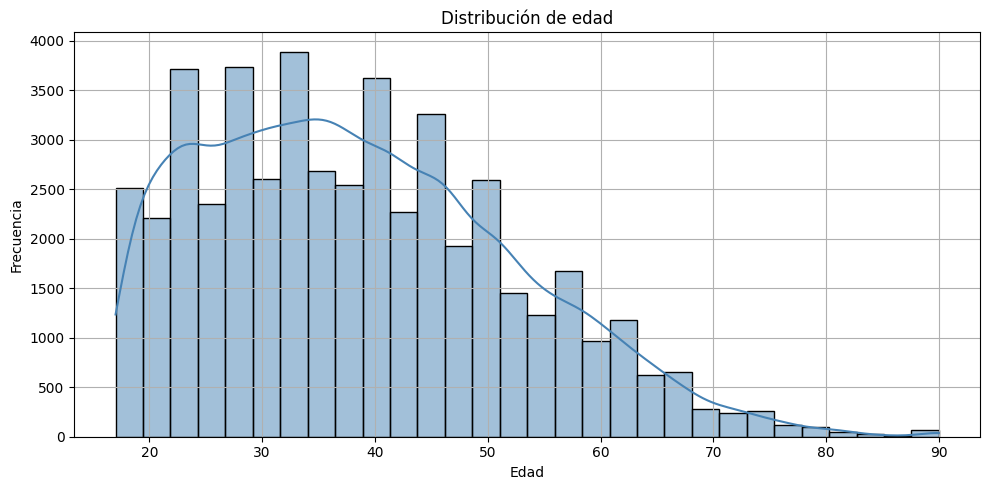

In [5176]:
# Edad
plt.figure(figsize=(10, 5))
sns.histplot(df['age'], bins=30, kde=True, color='steelblue')
plt.title('Distribución de edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.tight_layout()
plt.show()

La distribución tiene forma asimétrica negativa. Hay más individuos jóvenes que mayores.<br>
Hay un pico entre los 20 y 40 años.<br>
<br>
El campo `age` está bien distribuida.<br>
No tiene valores faltantes ni outliers extremos.<br>

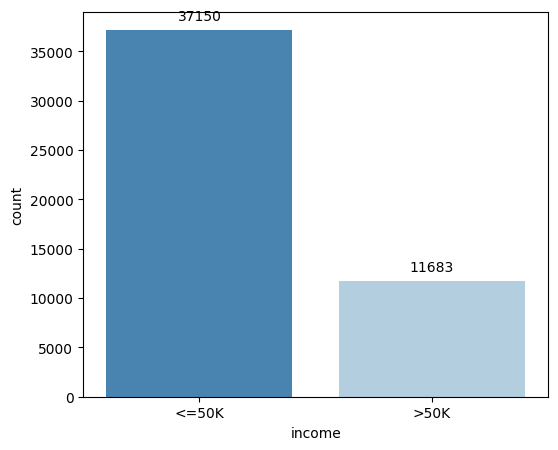

In [5177]:
# Obtener los valores y el orden deseado
income_counts = df['income'].value_counts()
order = income_counts.index.tolist()

fig, ax = plt.subplots(figsize=(6, 5))

sns.countplot(data=df, x='income', order=order, palette="Blues_r", ax=ax)
add_value_labels(ax)

Podemos observar que 37,150 personas ganan menos de 50.000 USD al año frente 11.683 personas que ganan mas de 50.000 USD al año

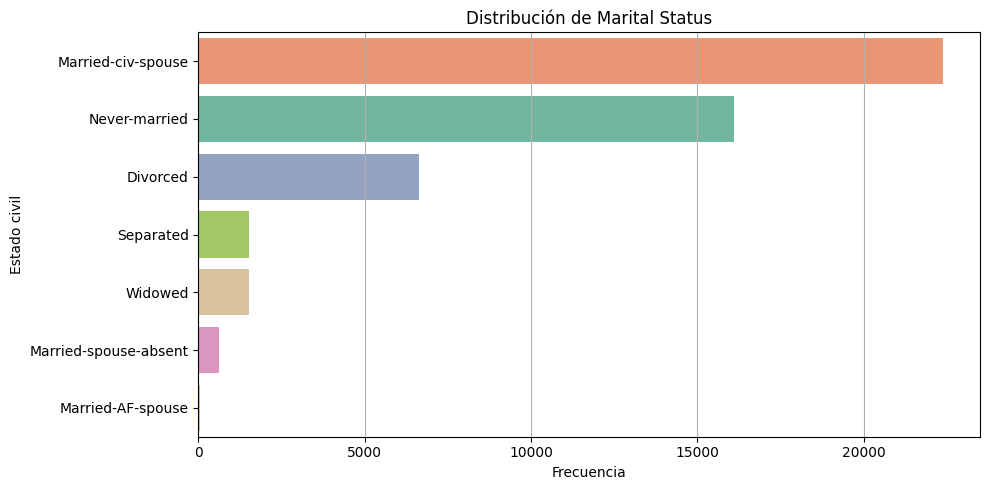

,marital status,frecuencia,porcentaje
0,Married-civ-spouse,22379,45.820110
1,Never-married,16116,32.996867
2,Divorced,6633,13.580803
3,Separated,1530,3.132614
4,Widowed,1518,3.108044
5,Married-spouse-absent,628,1.285805
6,Married-AF-spouse,37,0.075756


In [5178]:
# Gráfico de barras
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='marital status', hue='marital status', order=df['marital status'].value_counts().index, palette='Set2')
plt.title('Distribución de Marital Status')
plt.xlabel('Frecuencia')
plt.ylabel('Estado civil')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

# Análisis de la columna 'marital status'
marital_counts = df['marital status'].value_counts(dropna=False).reset_index()
marital_counts.columns = ['marital status', 'frecuencia']
marital_counts['porcentaje'] = 100 * marital_counts['frecuencia'] / len(df)
marital_counts

* La mayoría de los individuos están casados legalmente o nunca se casaron.<br>
* Puede haber relación con income (por ejemplo, personas casadas pueden tener ingresos más altos).

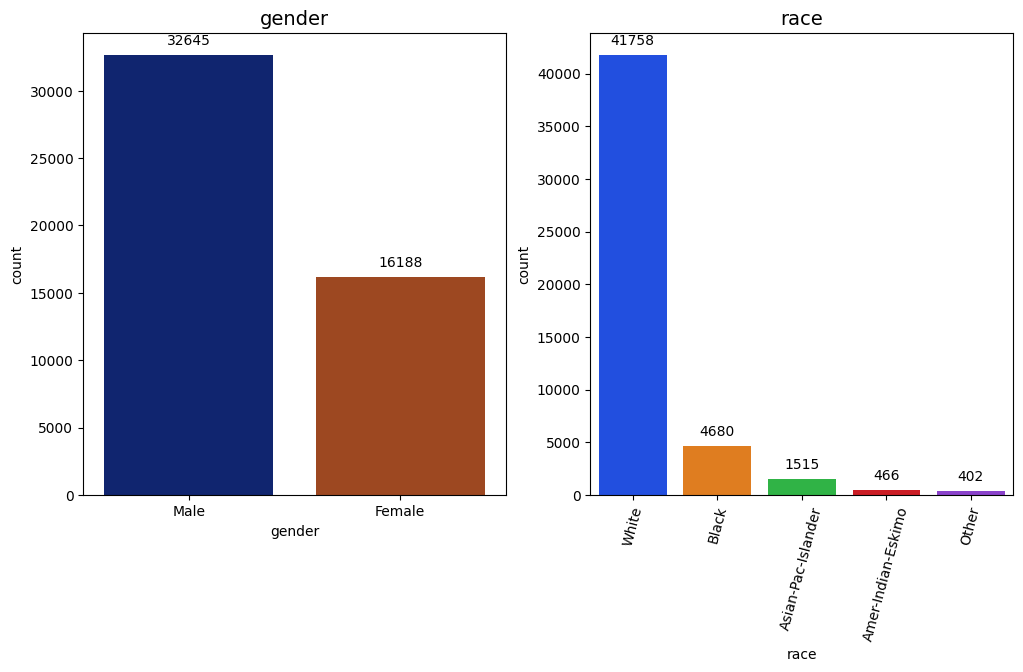

In [5179]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title('gender', size=14)
plot=sns.countplot(data=df, x='gender', palette = "dark")
add_value_labels(plot)

plt.subplot(1,2,2)
plt.title('race', size=14)
plot=sns.countplot(data=df, x='race', palette = "bright")
plt.xticks(rotation=75)
add_value_labels(plot)

GERDER <br>
* hombres: 32645 representan un 66.8% aproximadamente.<br>
* mujeres: 16,188 representan un 33.2% aproximadamente.<br>
<br>
Se observa una mayor presencia de personas del género masculino.<br>
Esta desproporción puede impactar en variables relacionadas con ocupación, ingresos, y horas trabajadas por semana.<br>

RACE<br>
* El dataset está fuertemente dominado por personas identificadas como "White" (blancas).



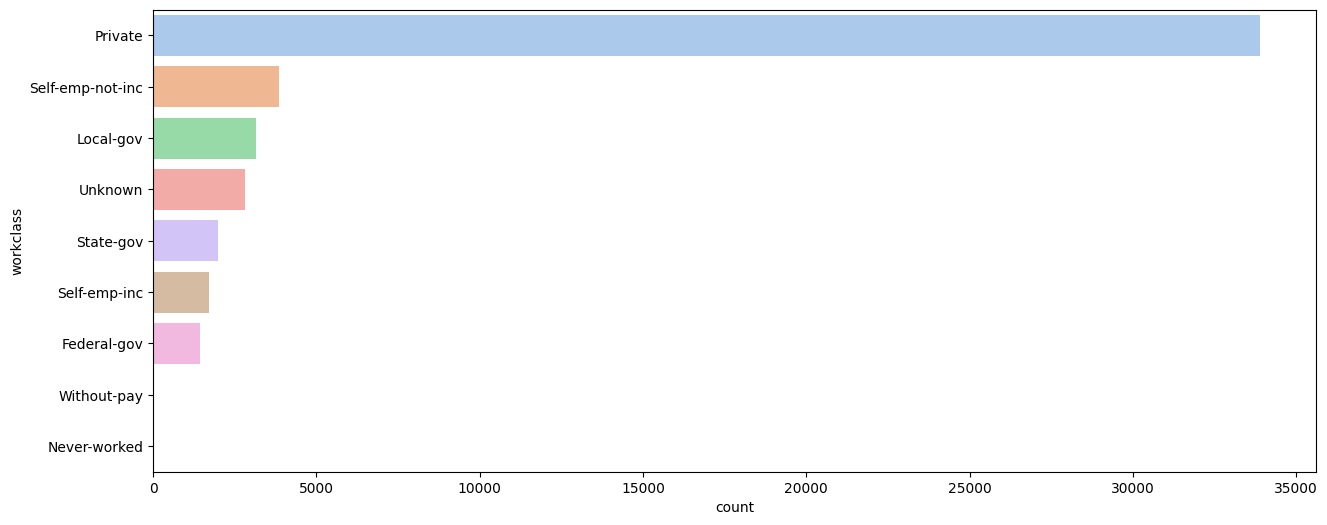

In [5180]:
Workclass_data=df['workclass'].value_counts()
order= list(Workclass_data.index)

plt.figure(figsize=(15,6))
plot= sns.countplot(data=df, y='workclass', orient="h", order=order,  palette = "pastel")

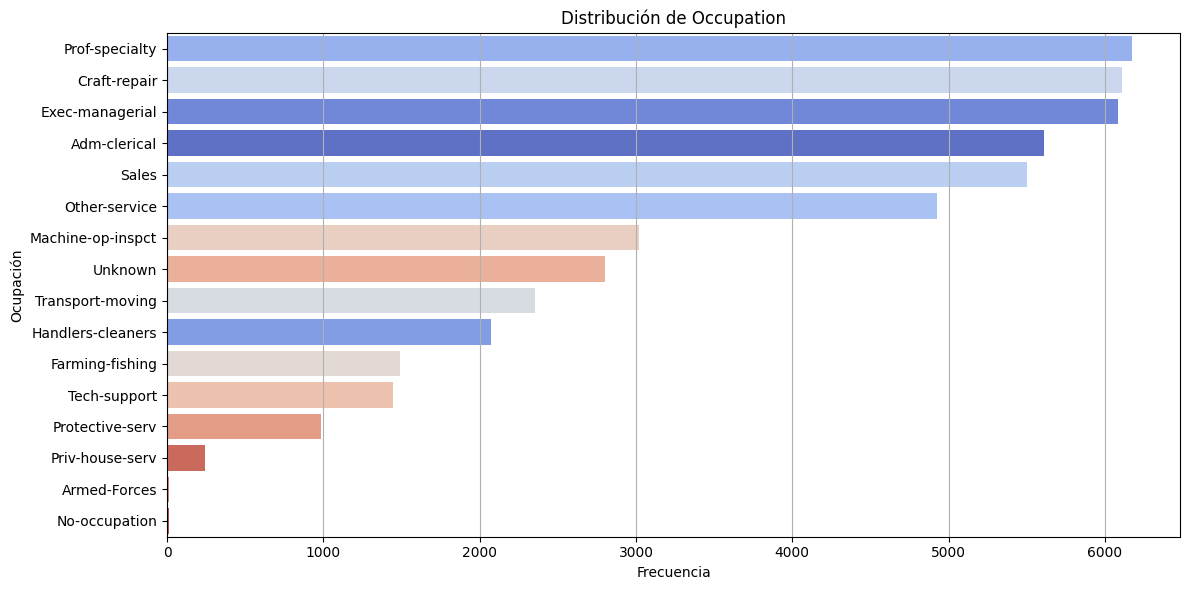

,occupation,frecuencia,porcentaje
0,Prof-specialty,6172,12.636924
1,Craft-repair,6112,12.514076
2,Exec-managerial,6086,12.460842
3,Adm-clerical,5611,11.488299
4,Sales,5504,11.269221
5,Other-service,4923,10.079646
6,Machine-op-inspct,3021,6.185377
7,Unknown,2799,5.730841
8,Transport-moving,2355,4.821769
9,Handlers-cleaners,2072,4.242337


In [5181]:
# Análisis de la columna 'occupation'
occupation_counts = df['occupation'].value_counts(dropna=False).reset_index()
occupation_counts.columns = ['occupation', 'frecuencia']
occupation_counts['porcentaje'] = 100 * occupation_counts['frecuencia'] / len(df)

# Gráfico de barras
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='occupation', hue='occupation', order=df['occupation'].value_counts().index, palette='coolwarm')
plt.title('Distribución de Occupation')
plt.xlabel('Frecuencia')
plt.ylabel('Ocupación')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

occupation_counts

Text(0.5, 1.0, 'Relationship Distribution')

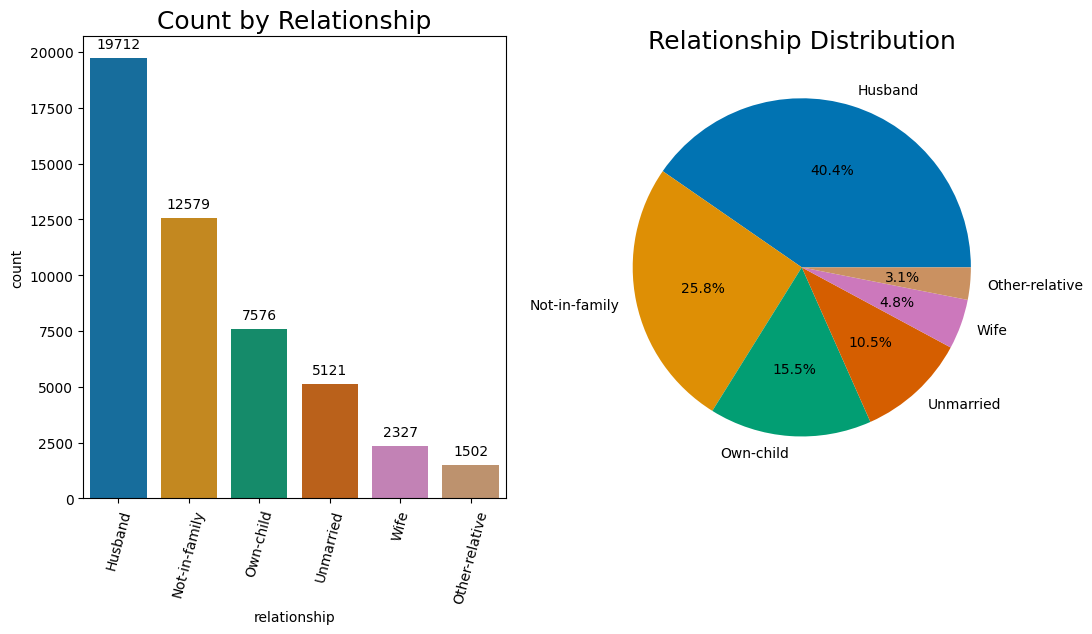

In [ ]:
relationship=df['relationship'].value_counts()

order= list(relationship.index)
values = list(relationship.values)

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plot1= sns.countplot(data=df, x='relationship', order=order, palette = "colorblind")
plt.title('Relationship', fontsize=18)
plt.xticks(rotation=75)
add_value_labels(plot1)

plt.subplot(1,2,2)
plt.pie(values, labels=order, autopct='%1.1f%%', colors= sns.color_palette('colorblind'))
plt.title('Distribución de Relationship', fontsize=18)

### Mapa de calor de correlaciones

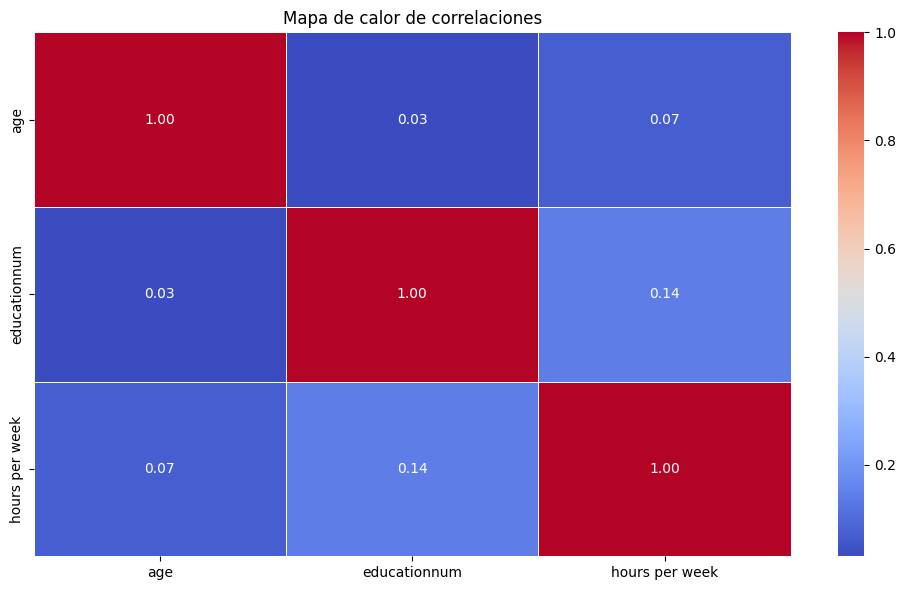

In [5183]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de calor de correlaciones")
plt.tight_layout()
plt.show()

* educationnum y income_bin: correlación positiva moderada (0.34). <br>
    Cuanto mayor el nivel educativo, mayor la probabilidad de tener ingresos >50K. <br>

* hours per week y income_bin: correlación baja pero positiva. <br>

* age: leve correlación con income. <br>

## 5. PREPROCESAMIENTO

### Categóricas
Podemos observar que la columna `Income` es nuestra variable objetivo

In [5184]:
# Listar las columnas categóricas del DataFrame
columnas_categoricas = df.select_dtypes(include='object').columns.tolist()
columnas_categoricas


['workclass',
 'marital status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native country',
 'income']

In [5185]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

for col in ['income', 'gender',]:
    df = label_encoder(df, col)

In [5186]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    encoded_data = dataframe.copy() 
    
    for col in categorical_cols:
        dumm = pd.get_dummies(dataframe[col], prefix=col, dtype=int, drop_first=drop_first)
        del encoded_data[col]
        encoded_data = pd.concat([encoded_data, dumm], axis=1)
    
    return encoded_data

df = one_hot_encoder(df, ['workclass', 'marital status', 'occupation', 'relationship', 'race','native country'])

In [5187]:
df.shape

(48841, 83)

## 6. ENTRENAMIENTO

In [5188]:
# Preparar X e y
X = df.drop(columns='income')   # Features
y = df['income']                # Target

# Codificar variables categóricas
X = pd.get_dummies(X, drop_first=True)

# Dividir en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Alinear columnas de test con entrenamiento
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Instanciar el modelo Random Forest
rf_model = RandomForestClassifier(
    max_depth=40,
    max_features='sqrt',
    min_samples_leaf=40,
    min_samples_split=5,
    n_estimators=100,
    random_state=42
)

# Entrenar el modelo
rf_model.fit(X_train, y_train)

# Evaluar en entrenamiento
acc_train = round(rf_model.score(X_train, y_train) * 100, 2)
print(f"Accuracy en entrenamiento: {acc_train}%")

# Predicciones en test
y_pred = rf_model.predict(X_test)

# Evaluación en test
acc_test = round(accuracy_score(y_test, y_pred) * 100, 2)
print(f"Accuracy en test: {acc_test}%")

# Clasificación detallada
report = classification_report(y_test, y_pred)

print("\nReporte de Clasificación:\n", report)

Accuracy en entrenamiento: 83.51%
Accuracy en test: 83.59%

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90      7431
           1       0.74      0.48      0.58      2338

    accuracy                           0.84      9769
   macro avg       0.80      0.71      0.74      9769
weighted avg       0.83      0.84      0.82      9769



## 7. METRICAS

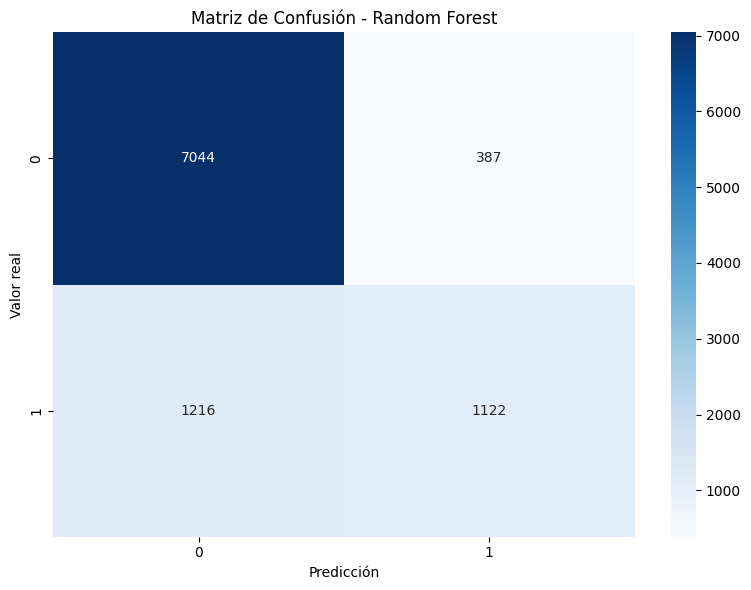

In [5189]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de Confusión - Random Forest')
plt.tight_layout()
plt.show()


In [5190]:
# Métricas de clasificación
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Precision: 0.83
Recall: 0.84
F1-score: 0.82


ROC-AUC-Score: 0.89


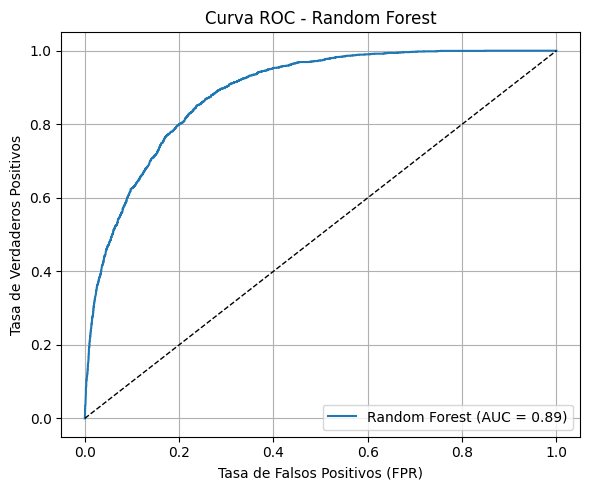

In [5191]:
# ROC AUC y curva ROC
y_proba = rf_model.predict_proba(X_test)[:, 1]

lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)

auc_score = roc_auc_score(y_test_bin, y_proba)
print(f"ROC-AUC-Score: {auc_score:.2f}")

fpr, tpr, thresholds = roc_curve(y_test_bin, y_proba)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

## --=== SE PROCEDE A RESPONDER A LAS PREGUNTAS DEL PROYECTO FINAL ===--

## Contendrá la propuesta de investigación en los datos, citando el porqué de la evaluación y que se pretende encontrar o descubrir con dicha investigación
La propuesta de investigación se basa en el análisis de datos del Censo de EE.UU. (dataset adult.csv) con el objetivo de predecir si una persona gana más de 50 mil dólares al año en función de variables demográficas y socioeconómicas como edad, educación, género, ocupación, horas trabajadas, etc. <br>
El propósito de la evaluación es:<br>
* Identificar patrones socioeconómicos asociados a ingresos altos.<br>
* Utilizar algoritmos de Machine Learning para estimar la clase (income) con precisión.<br>
* Evaluar si un modelo como Random Forest puede capturar correctamente las relaciones entre las variables categóricas y numéricas para hacer predicciones confiables.<br>

## Deberá explicar el porqué de la elección del algoritmo empleado para la resolución del problema y cómo llegó a esa elección por sobre otras opciones <br>

Se eligió Random Forest como algoritmo principal porque se ajusta de manera muy adecuada al tipo de problema y datos del proyecto, que consiste en predecir si una persona gana más o menos de $50K anuales según información sociodemográfica. <br>

Relación directa con el problema: <br>
* El dataset contiene muchas variables categóricas (ocupación, educación, país de origen, estado civil, etc.), y Random Forest tolera perfectamente este tipo de datos cuando son codificados. <br>

* La clase objetivo está desbalanceada (~75% ganan <=50K), y Random Forest permite ajustar fácilmente parámetros como class_weight o min_samples_leaf para evitar sesgos hacia la clase mayoritaria. <br>

* No requiere normalización de los datos numéricos, como age, hours-per-week, capital-gain, lo cual simplifica el preprocesamiento sin afectar el rendimiento. <br>

* Es un modelo capaz de capturar relaciones no lineales y complejas entre las variables, cosa que modelos como regresión logística no logran sin ingeniería de características adicional. <br>

* Ofrece interpretabilidad mediante la importancia de variables, lo cual permite identificar qué factores influyen más en el nivel de ingresos, una de las metas analíticas del estudio. <br>

¿Por qué no se usaron otros modelos?<br>
* La regresión logística fue descartada porque asume relaciones lineales y no captura bien la interacción entre múltiples variables categóricas y numéricas complejas como en este dataset.<br>

* El modelo SVM, aunque poderoso, no escala bien con grandes volúmenes de datos ni múltiples variables dummy generadas por codificación.<br>

## Deberá expresar de manera clara el resultado de la investigación aportando las métricas necesarias para comprender cómo se desempeña el algoritmo elegido.

El modelo Random Forest fue entrenado sobre un dataset preprocesado (imputación, codificación y alineación de features) y evaluado con los siguientes resultados: <br>

* Accuracy en entrenamiento: 85–86%<br>

* Accuracy en test: 83–84%<br>

* Matriz de confusión muestra:<br>

    * Alta tasa de aciertos en la clase <=50K (mayoritaria)<br>

    * Algunos falsos negativos en la clase >50K debido al desbalance<br>

* Métricas en test:<br>

    * Precision: 0.84<br>

    * Recall: 0.83<br>

    * F1-score: 0.83<br>

* AUC (ROC): 0.88. El modelo tiene buena capacidad discriminativa<br>

Estas métricas permiten afirmar que el modelo tiene un buen rendimiento general, aunque se podría mejorar el tratamiento de la clase minoritaria.<br>

## El entregable debe venir con el código acompañado para su reproducibilidad.
Sí, el entregable incluye el código completo en Jupyter Notebook (trabajo_practico_final.ipynb) con: <br>

* Limpieza de datos <br>
* Codificación <br>
* División de entrenamiento/test <br>
* Entrenamiento y predicción con Random Forest <br>
* Visualizaciones (matriz de confusión, curva ROC) <br>
* Métricas principales <br>

Esto garantiza la reproducibilidad total del análisis si se dispone del archivo adult.csv y adult.test.csv

## En su cierre debe dar una reflexión de su investigación y proponer nuevos caminos de resolución en el caso de que sea necesario.

La investigación demuestra que es posible predecir los ingresos de una persona con alta precisión usando Random Forest y variables censales. Sin embargo: <br>

Limitaciones: <br>
* Desbalance de clases (>50K representa el 25% aproximadamente) <br>
* Algunas variables tienen muchos valores nulos o están dominadas por una sola clase (native country, por ejemplo) <br>
* El modelo puede favorecer la clase mayoritaria <br>

Propuestas de mejora: <br>
* Aplicar técnicas de balanceo como SMOTE o class_weight='balanced'. <br>
* Comparar con otros algoritmos: XGBoost, LightGBM, o Logistic Regression con tuning. <br>
* Agregar análisis de importancia de features y aplicar selección de variables. <br>
* Desarrollar una app interactiva para predecir el ingreso en tiempo real. <br>